<a href="https://www.kaggle.com/code/astakalaswapnil/online-retail-clustering?scriptVersionId=101820340" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Online Retail Dataset: **

* Online retail is a transactional data collection comprising all transactions for a UK-based and registered online retail non-store between 01/12/2010 and 09/12/2011. The business primarily offers distinctive all-occasion gifts. Many of the firm's clients are wholesalers.
* The size of this dataset is about 541909 rows and 8 columns (invoice number, Stock code, Description, Quantity, Invoice date, Unit price, Customer ID)
* We had performed Unsupervised learning algorithms on this dataset like K-Means and Hierarchical clustering 

# 1. Basic Imports

In [1]:
#_____________________________importing required libraries for dataframe(df) & Visuvalization________________________________#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#_______________________________importing libraries that are reqiuired for clustering________________________________________#
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#____________________________importing warnings to avoid unneccessary information___________________________________________#
import warnings
warnings.filterwarnings("ignore")

# 2. Loading Dataset

In [2]:
df=pd.read_csv('../input/onlineretail/OnlineRetail.csv', encoding= 'cp1252' , header=0)
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
# Droping rows having missing values

df = df.dropna()
df.shape

(406829, 8)

In [8]:
# Changing the datatype of Customer Id as per Business understanding

df['CustomerID'] = df['CustomerID'].astype(str)

# 3. Basic Analysis

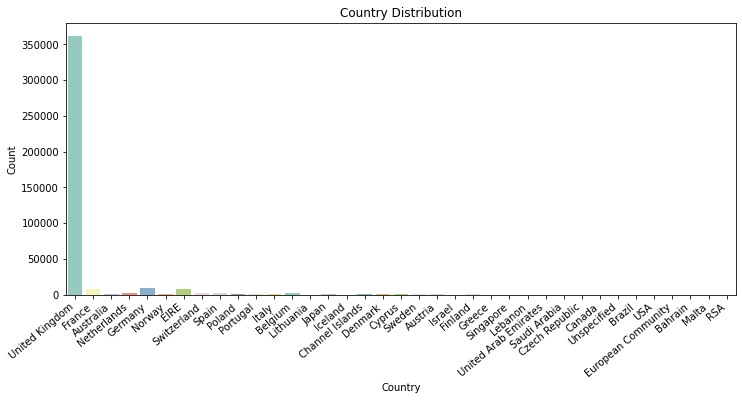

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(df['Country'],palette= 'Set3')
plt.xticks(rotation=40,ha='right')
plt.title("Country Distribution")
plt.xlabel('Country')
plt.ylabel('Count');

The United Kingdom has the highest distribution than the other countries.

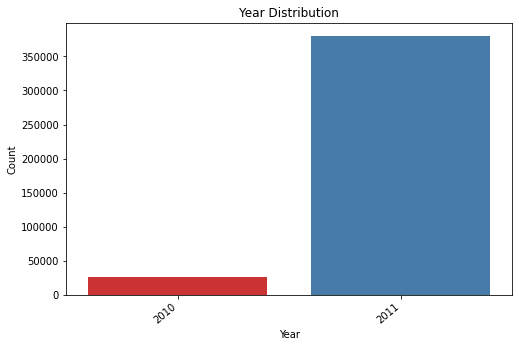

In [10]:
plt.figure(figsize=(8,5))
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
sns.countplot(df['InvoiceDate'].dt.year,palette= 'Set1')
plt.xticks(rotation=40,ha='right')
plt.title("Year Distribution")
plt.xlabel('Year')
plt.ylabel('Count');

In the year 2011 there were high sales than the 2010.

Text(0.5, 0, 'Month')

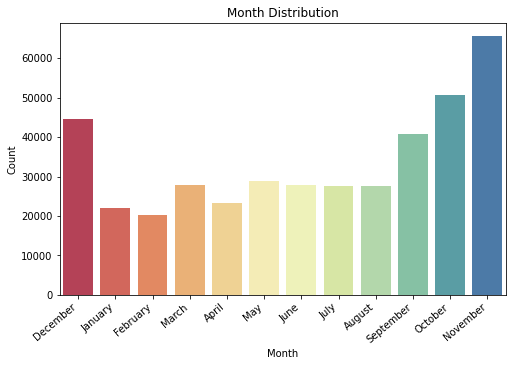

In [11]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=40,ha='right')
sns.countplot(df['InvoiceDate'].dt.month_name(),palette= 'Spectral')
plt.title("Month Distribution")
plt.ylabel('Count')
plt.xlabel('Month')

In the year ending there were highest amount of sales than the beginning of the year.

Text(0, 0.5, 'Count')

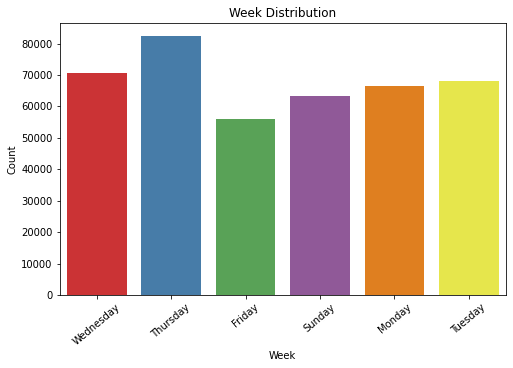

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(df['InvoiceDate'].dt.day_name(),palette= 'Set1')
plt.xticks(rotation=40)
plt.title("Week Distribution")
plt.xlabel('Week')
plt.ylabel('Count')

During the Wednesday and the Thursday there are high amount of sales that can sold so servers might be busy on those couple of days, are need to maintained correctly.

# 4. Attributes (Amount, Frequency and Recency)

In [13]:
# New Attribute : Amount:

df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [14]:
# New Attribute : Frequency

rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [15]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()


,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [16]:
# New Attribute : Recency

# Convert to datetime to proper datatype

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [17]:
# Compute the maximum date to know the last transaction date

max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [18]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [19]:
# Compute last transaction date to get the recency of customers

rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()


,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [20]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [21]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# 5. Dealing with Outliers

Text(0.5, 0, 'Attributes')

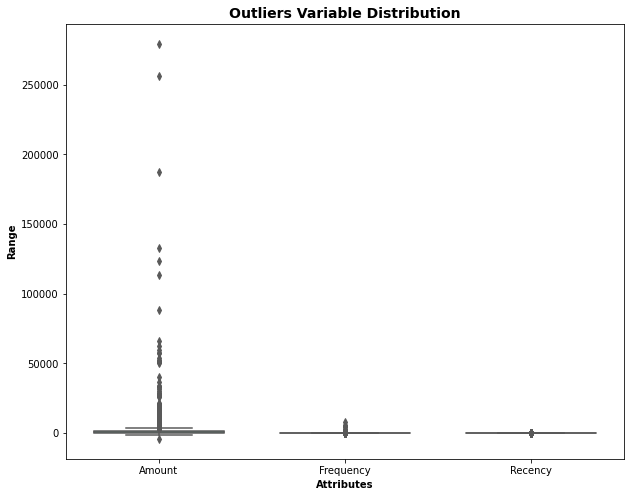

In [22]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')


In [23]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [24]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [25]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# 6. K-Means

In [26]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [27]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In these we select several classes to initialize their respective centre points. The centre points are vector of same length as each data point vector and ‘v’ as graph It is like mean graph, but it is used arbitrary starting data point using distance epsilon to find parameter of each cluster. It uses top down or bottom approach.
The determination of the optimum number of clusters into which the data may be clustered is a fundamental step for any unsupervisedalgorithm. One of the most common methods for evaluating this optimum k value is the Elbow Method.

Text(0, 0.5, 'Intertia')

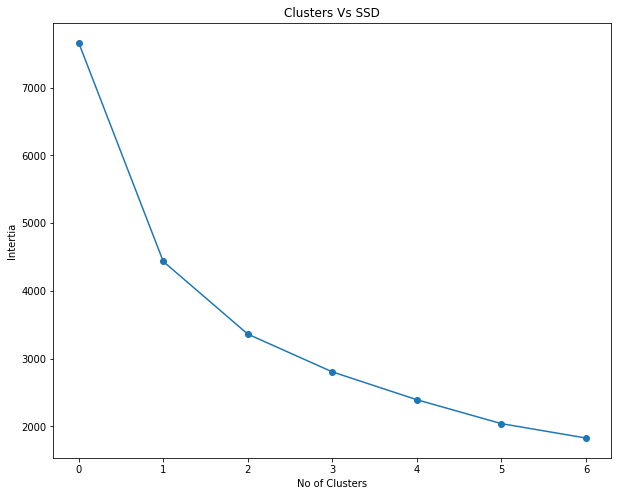

In [28]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd, marker='o')
plt.title('Clusters Vs SSD')
plt.xlabel('No of Clusters')
plt.ylabel('Intertia')


The equation of Silhouette is: 𝑆𝑖𝑙ℎ𝑜𝑢𝑒𝑡𝑡𝑒 𝑠𝑐𝑜𝑟𝑒 = 𝑝−𝑞 / 𝑚𝑎𝑥(𝑝,𝑞)
    Where, P is the mean distance of the closest cluster where it is not a member of the data point. 
            In relation to its own cluster, q is the mean intra cluster distance to all the points.
• The value of this score varies from -1 to 1.
• Which is closer to 1, is very similar in its own cluster to the other point.
• It is not identical to the data points in its cluster when the score is -1



In [29]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.541842117113117
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4816531272445321
For n_clusters=5, the silhouette score is 0.46460502083115957
For n_clusters=6, the silhouette score is 0.41761781846185914
For n_clusters=7, the silhouette score is 0.4154636088618486
For n_clusters=8, the silhouette score is 0.40828183848961574


In [30]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)


KMeans(max_iter=50, n_clusters=3)

In [31]:
 kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0], dtype=int32)

In [32]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

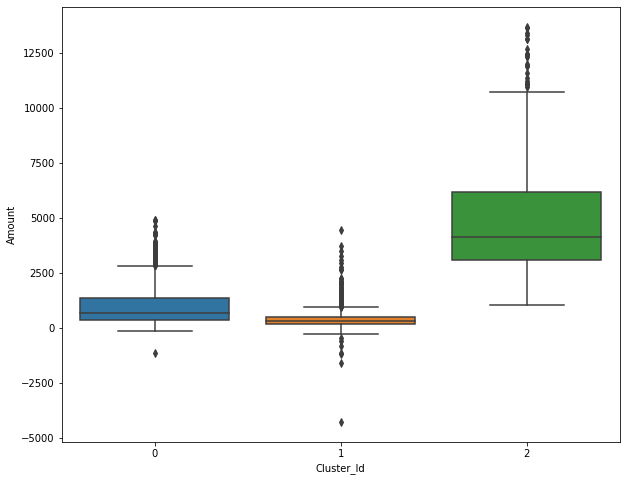

In [33]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

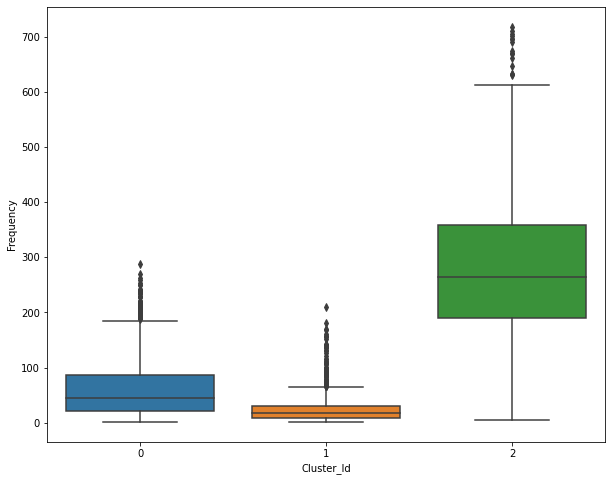

In [34]:

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

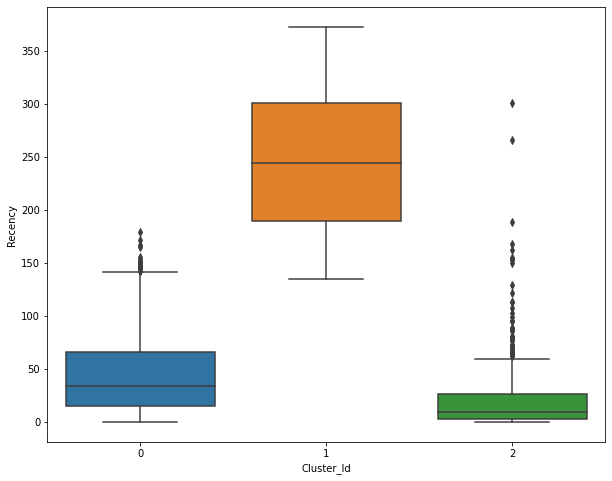

In [35]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

# 7. Results (K-means Clustering)

**Analysis of Results (K-Means clustering):**

1. Customer with Cluster_id 1 has contributed the highest amount and least is the 
   customers with Cluster_id 2.
2. The most frequent buyers are clients with Cluster-id 1.
3. Customers are not recent buyers of Cluster-id 2.


# 8. Hierarchical Clustering

**Hierarchical Clustering:**

The algorithm works on the principal “hierarchy of clusters”. In this algorithm two nearest data clusters are merged into same cluster. It terminates when it has only one cluster. This algorithm uses bottom-up approach. The decision of merged the clusters is formed by closeness.


**Single Linkage:**

The distance between two clusters is defined in single linkage hierarchical clustering as “the shortest distance between two points in each cluster”.

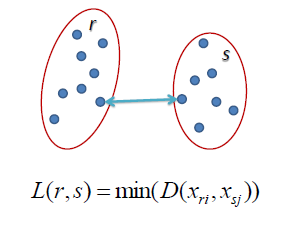


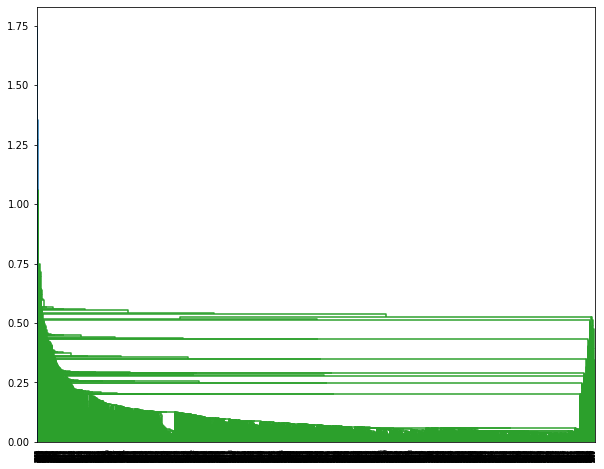

In [36]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

**Complete Linkage:**

The distance between two clusters”, is known as the longest distance between two 
points in each cluster in complete linkage hierarchical clustering.

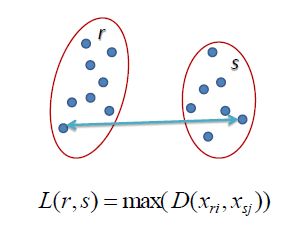

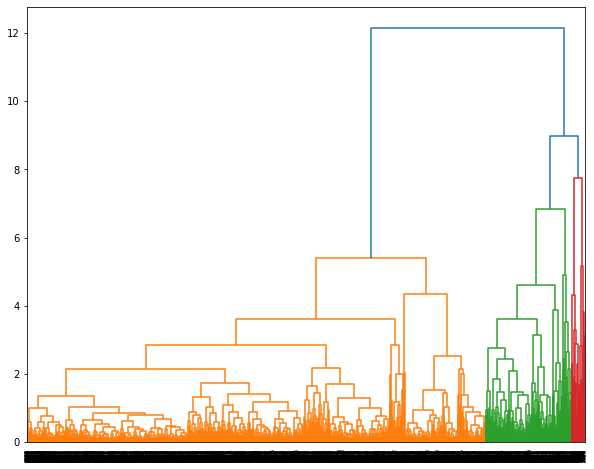

In [37]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

**Average Linkage:**

The distance between two clusters in average linkage hierarchical clustering is defined as, “the average distance between each point in one cluster and each point in the other cluster.


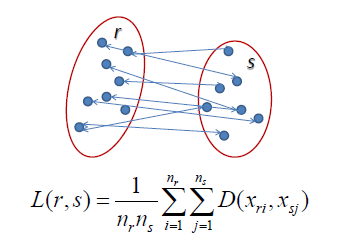

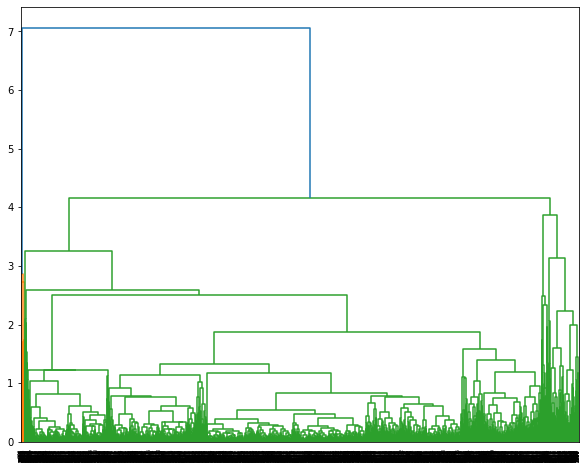

In [38]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [39]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,2,0
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,1,0


<AxesSubplot:xlabel='Cluster_Labels', ylabel='Amount'>

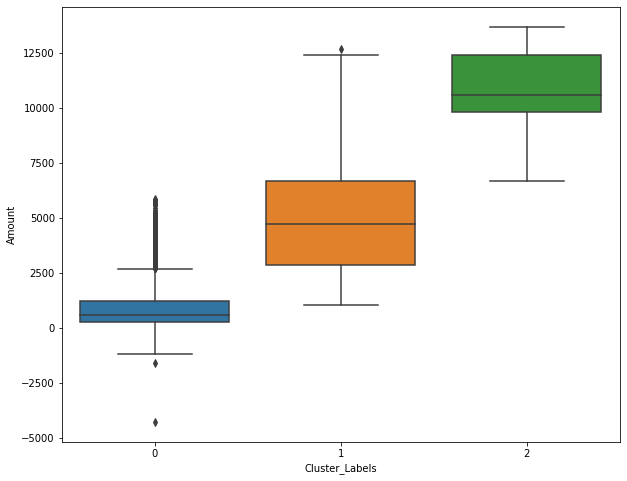

In [41]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Frequency'>

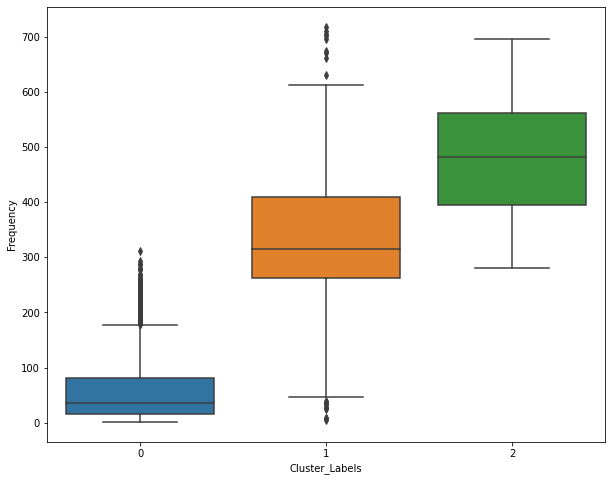

In [42]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Recency'>

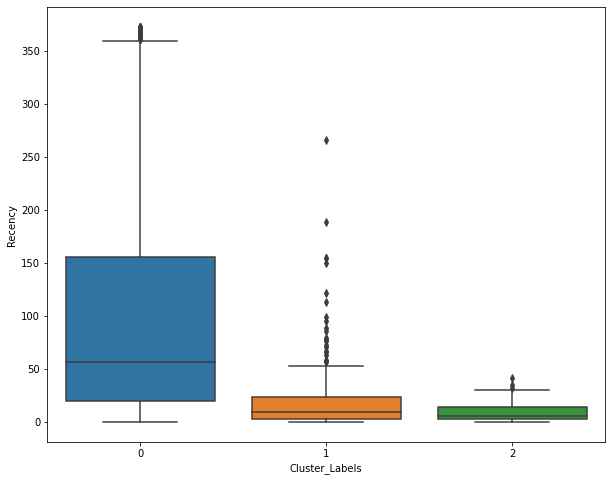

In [43]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

# 9. Results (Hierarchical Clustering)

Analysis of Results (Hierarchical Clustering):
 
1. Customers with cluster_labels 1 are contributed highest amount where as the least 
   are with cluster_labels 0.
2. Customers with cluster_label 2 are not recent buyers.
3. Customer with cluster_labels 2 are frequent buyers and followed by customers with 
   cluster_lables 1.

> ** Thank you...! For Visiting, Please upvote my page and encourage **

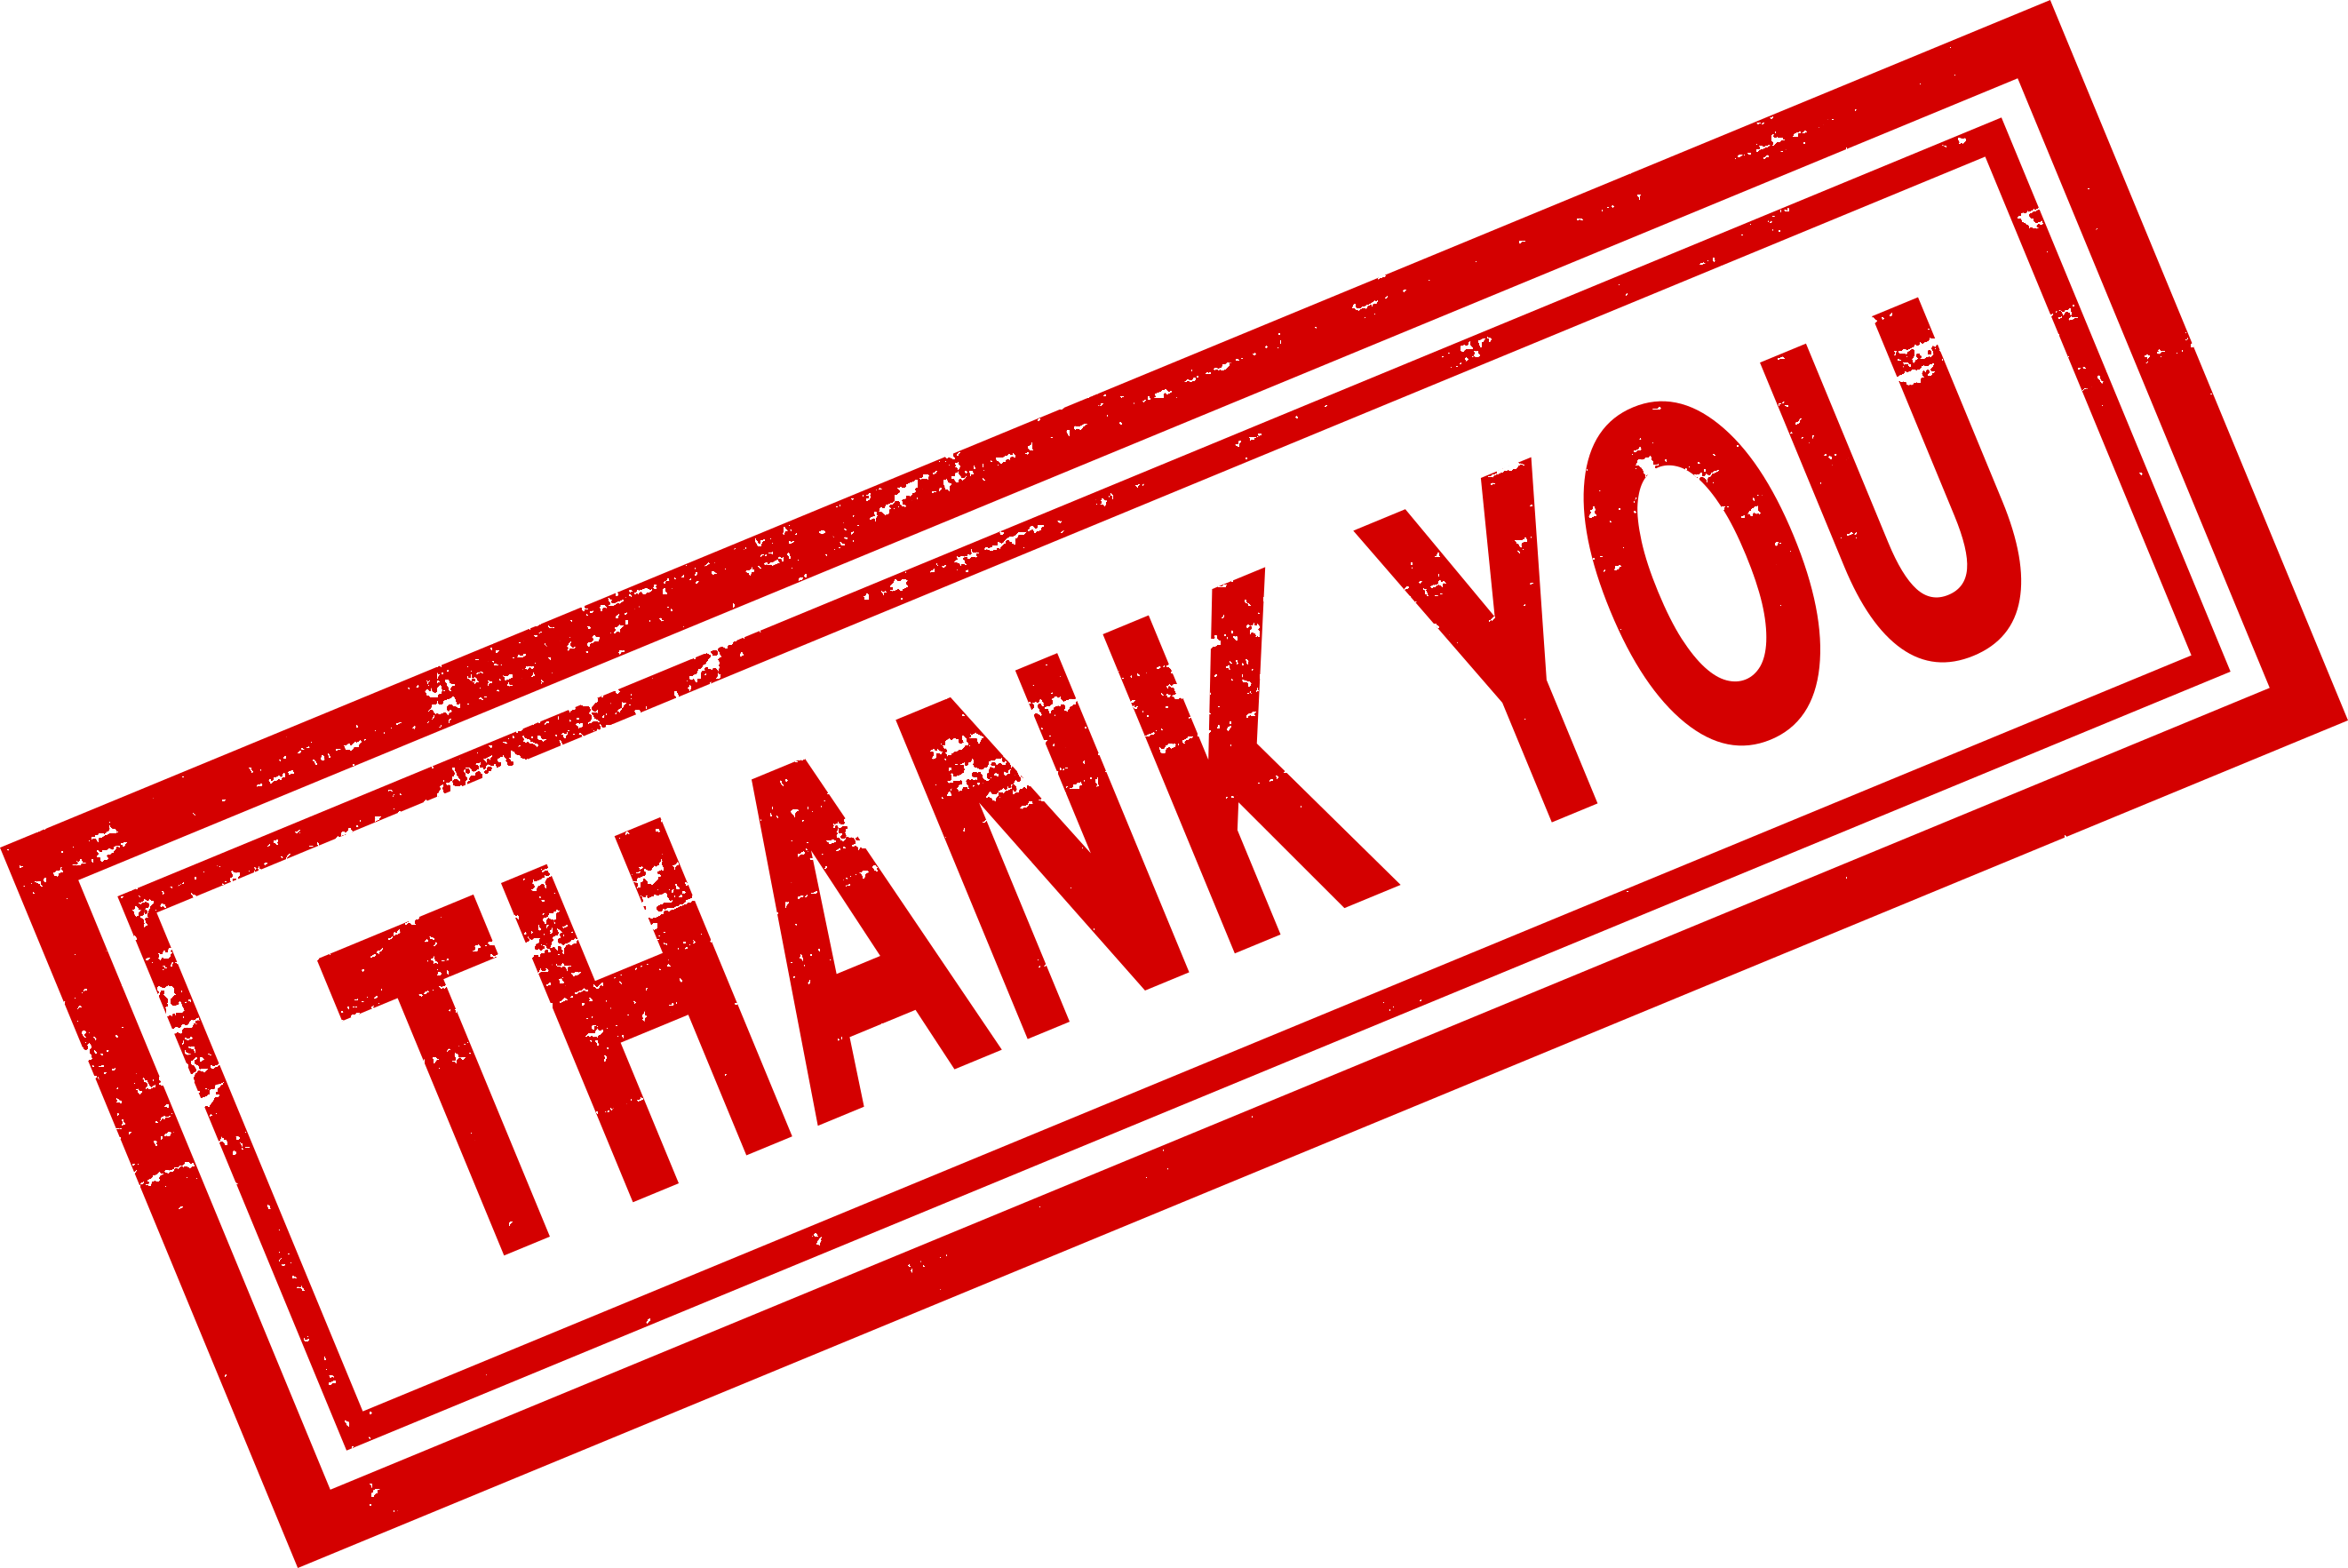